In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes

In [2]:
data = pd.read_csv("/Users/rezaalemy/Downloads/Medicare_Provider_Util_Payment_PUF_CY2017/Medicare_Provider_Util_Payment_PUF_CY2017.txt", delimiter='\t')

/Users/rezaalemy/anaconda3/envs/alij/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
0,1,CPT copyright 2016 American Medical Associatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,100.0,96.0,100.0,73.398800,325.780000,56.827200,57.492400
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99218,Hospital observation care typically 30 minutes,N,26.0,25.0,26.0,100.080000,449.000000,78.460000,79.306154
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,52.0,51.0,52.0,136.380000,614.000000,102.807692,103.895385
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99220,Hospital observation care typically 70 minutes...,N,59.0,59.0,59.0,190.363729,755.932203,141.293559,142.865763


In [4]:
data = data.drop(0)

In [8]:
provider_data = data[['npi','average_Medicare_allowed_amt', 'average_submitted_chrg_amt','hcpcs_code']]\
                    .groupby('npi')\
                    .agg({'average_Medicare_allowed_amt': 'mean', \
                          'average_submitted_chrg_amt':'mean', \
                          'hcpcs_code': 'count'})

In [20]:
provider_data['gap'] = np.log(provider_data['average_submitted_chrg_amt'] / \
                              provider_data['average_Medicare_allowed_amt'])
provider_data = provider_data.sort_values('gap')
provider_data.shape

(1032911, 4)

## How many providers have no discrepancy?

In [19]:
provider_data[provider_data['gap']== 0.0].shape

(19705, 4)

### How many have high level of discrepancy (7 times and more)

In [34]:
provider_data[provider_data['gap']> 2.0].shape

(67667, 4)

Text(0.5, 0, 'number of providers')

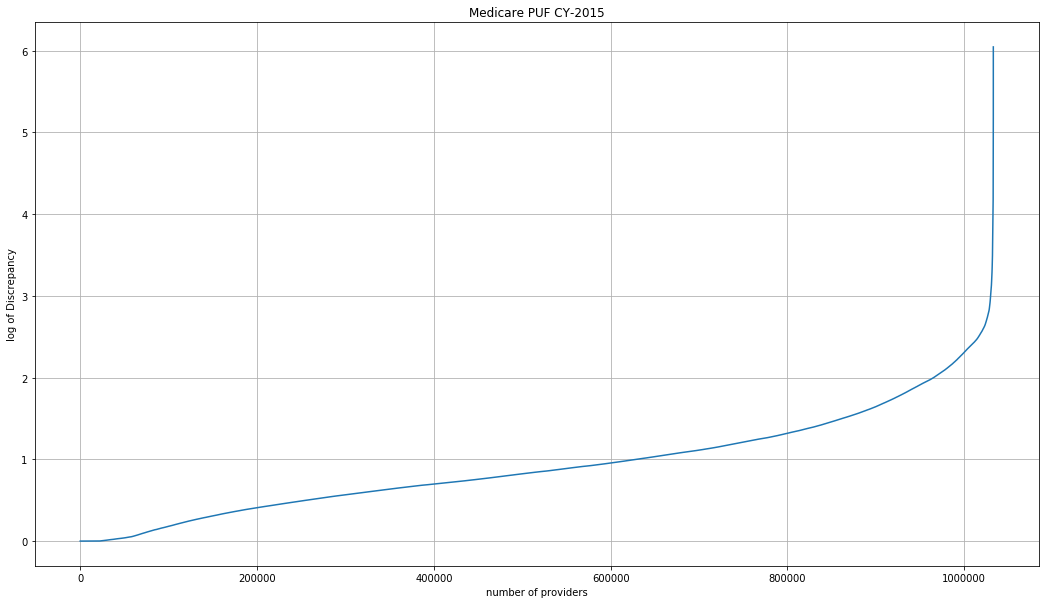

In [26]:
plt.figure(figsize = (18,10))
plt.grid()
plt.plot(np.array(provider_data['gap']).reshape(-1,1))
plt.title("Medicare PUF CY-2015")
plt.ylabel('log of Discrepancy')
plt.xlabel('number of providers')


In [88]:
high_charge_codes = provider_data[provider_data['gap']> 2.0].groupby('hcpcs_code').agg({'average_Medicare_allowed_amt': 'count', 'gap': 'mean'}).rename(columns={
    'average_Medicare_allowed_amt': 'count'
})
high_charge_codes.head()

,count,gap
hcpcs_code,,
1,7127,2.435094
2,9311,2.397783
3,10426,2.358884
4,9866,2.336315
5,8042,2.310136


## Most value is to providers with moderate amount of errors
few errors is usually due to human error. too many errors is probably a sign of late technology adaptors still using manual processes

In [93]:
high_charge = high_charge_codes
high_charge = high_charge[20:100] 


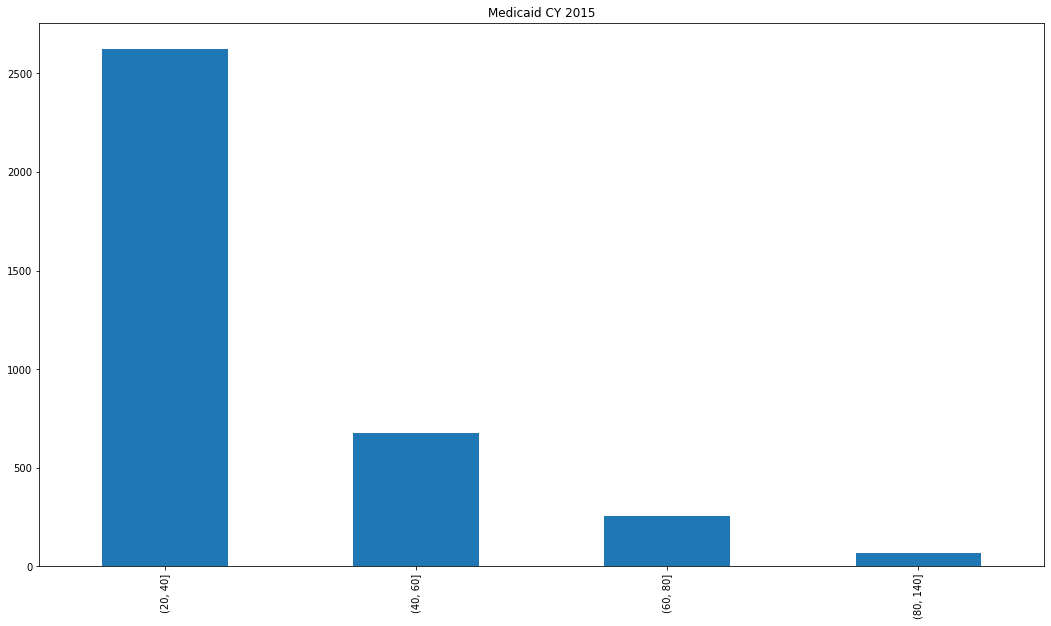

In [95]:
bined_charge = high_charge.groupby(pd.cut(high_charge.index, [20,40,60,80,140])).agg({'count':'sum', 'gap': 'mean' })
plot.set_xlabel('Number of overcharged codes')
plot.set_ylabel('Number of providers')
plot = bined_charge['count'].plot(kind = 'bar', figsize=(18,10) , title = "Medicaid CY 2015")


# Exploring to find potential effect of HCPCS Codes
it is possible that some codes are harder to identify and result in errors in calculation of the amount to charge. for example, it is possible that a visit code is used instead of a procedure code which results in discrepancy

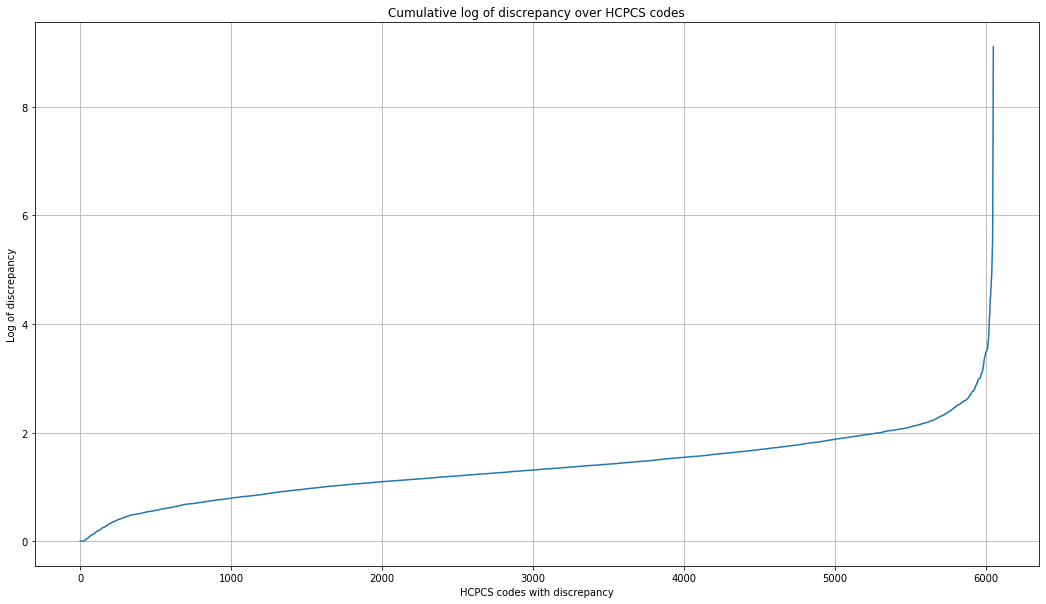

In [99]:
hcpcs_data = data[['hcpcs_code','average_Medicare_allowed_amt', 'average_submitted_chrg_amt']].groupby('hcpcs_code').mean()
hcpcs_data['gap'] = np.log(hcpcs_data['average_submitted_chrg_amt'] / hcpcs_data['average_Medicare_allowed_amt'])
hcpcs_data = hcpcs_data.sort_values('gap')
plt.figure(figsize=(18,10))
plt.xlabel('HCPCS codes with discrepancy')
plt.ylabel('Log of discrepancy')
plt.title('Cumulative log of discrepancy over HCPCS codes')
plt.plot(np.array(hcpcs_data['gap']).reshape(-1,1))
plt.grid()

In [100]:
hcpcs_data.tail()

,average_Medicare_allowed_amt,average_submitted_chrg_amt,gap
hcpcs_code,,,
J2810,0.299394,100.000000,5.811165
J2001,0.019395,14.058999,6.585999
A4212,0.010000,15.000000,7.313220
92593,0.010000,43.000000,8.366370
99401,0.010000,90.000000,9.104980


## Stratification by provider
Stratification of codes by provider shows even larger average gaps

In [111]:
hcpcs_provider_data = data[['hcpcs_code', 'npi','average_Medicare_allowed_amt', 'average_submitted_chrg_amt']].groupby(['hcpcs_code','npi']).mean()
hcpcs_provider_data['gap'] = np.log(hcpcs_provider_data['average_submitted_chrg_amt'] / hcpcs_provider_data['average_Medicare_allowed_amt'])
hcpcs_provider_data = hcpcs_provider_data.sort_values('gap')

In [112]:
hcpcs_provider_data.tail()

average_Medicare_allowed_amt  \
hcpcs_code npi                                        
31623      1487716437                      0.092500   
J3490      1851368377                      0.169250   
J1071      1972588598                      0.022261   
J2001      1487827408                      0.019302   
           1033317219                      0.020000   

                       average_submitted_chrg_amt        gap  
hcpcs_code npi                                                
31623      1487716437                       848.0   9.123427  
J3490      1851368377                      1695.0   9.211816  
J1071      1972588598                       300.0   9.508692  
J2001      1487827408                       500.0  10.162138  
           1033317219                       660.0  10.404263

### Which could show specific codes with which a specific provider is struggling

In [114]:
idx = pd.IndexSlice
hcpcs_provider_data.loc[idx[:,1033317219], idx[:]]

,,average_Medicare_allowed_amt,average_submitted_chrg_amt,gap
hcpcs_code,npi,,,
99223,1033317219,206.563235,310.277647,0.406861
99222,1033317219,143.090000,244.267273,0.534789
99204,1033317219,173.720000,357.500000,0.721691
99215,1033317219,153.360000,316.800000,0.725483
99214,1033317219,114.170000,274.515915,0.877321
99203,1033317219,114.622250,323.585500,1.037821
99213,1033317219,77.790000,219.748918,1.038473
20611,1033317219,97.457537,330.665025,1.221689
73565,1033317219,38.550769,192.504231,1.608142
